# Digit recoginition

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
train = pd.read_csv('train.csv')

In [67]:
print(train.shape)

(42000, 785)


In [68]:
X = train.drop(columns=['label'])
y = train['label']

In [69]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and temporary (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary data into training (80%) and validation (20%)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [70]:
print(X_train.shape,X_valid.shape,y_train.shape,y_valid.shape,X_test.shape,y_test.shape)

(25200, 784) (8400, 784) (25200,) (8400,) (8400, 784) (8400,)


In [71]:
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV 
param_grid = {'kernel': ('linear', 'rbf','poly') , 
              'C':[5, 10, 100],
              'gamma': [1,0.1,0.01], 
              'degree' : [1,2,3,4]}

grid = GridSearchCV(SVC() , param_grid , refit=True , verbose=3)
grid.fit(X_train,y_train)

print(grid.best_params_) 

In [72]:
svc = SVC(C=5,degree=2,gamma=1,kernel='poly')

In [73]:
svc.fit(X_train,y_train)

SVC(C=5, degree=2, gamma=1, kernel='poly')

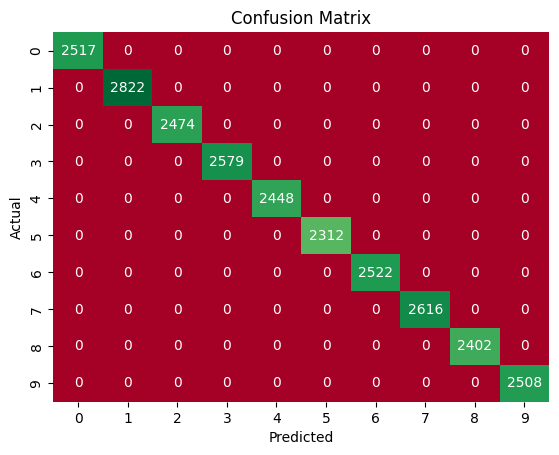

In [74]:
from sklearn.metrics import confusion_matrix

prediction = svc.predict(X_train)
cm = confusion_matrix(y_train, prediction)

labels = np.unique(y_train)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [75]:
from sklearn.metrics import recall_score,precision_score,f1_score

prediction = svc.predict(X_train)
print("Precision = ",format(precision_score(y_train,prediction,average=None).mean()))
print("Recall = ",format(recall_score(y_train,prediction,average=None).mean()))
print("F-1 Score = ",format(f1_score(y_train,prediction,average=None).mean()))

Precision =  1.0
Recall =  1.0
F-1 Score =  1.0


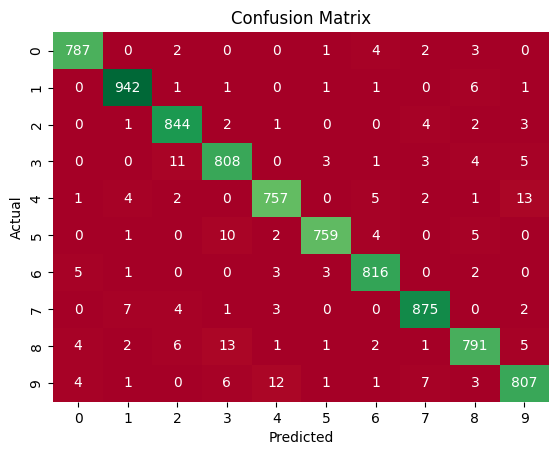

In [76]:
from sklearn.metrics import confusion_matrix

prediction = svc.predict(X_valid)
cm = confusion_matrix(y_valid, prediction)

labels = np.unique(y_valid)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [77]:
from sklearn.metrics import recall_score,precision_score,f1_score

prediction = svc.predict(X_valid)
print("Precision = ",format(precision_score(y_valid,prediction,average=None).mean()))
print("Recall = ",format(recall_score(y_valid,prediction,average=None).mean()))
print("F-1 Score = ",format(f1_score(y_valid,prediction,average=None).mean()))

Precision =  0.9745077483207206
Recall =  0.9742230057894339
F-1 Score =  0.9743453747980896
